<a href="https://colab.research.google.com/github/feysel2003/ML/blob/main/Twitter_Sentiment_Analysis_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Libraries and Load Data**

We need to set up our tools and bring the dataset into the environment.

In [1]:
# Upload the csv file from the local
from google.colab import files

uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [2]:
# Step 1: Import Libraries and Load Data

# Import data manipulation library
import pandas as pd

# Import numerical math library
import numpy as np

# Import plotting libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# We read the CSV file into a dataframe called 'df'

df = pd.read_csv('Tweets.csv')

# Show the first 10 rows to check if data loaded correctly
print("First 10 rows of the dataset:")
display(df.head(10))

# check the shape (number of rows and columns)
print(f"\nDataset Shape: {df.shape}")

First 10 rows of the dataset:


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)



Dataset Shape: (14640, 15)


**Step 1.2: Handling Imbalance**

We will use **Undersampling**. We will cut down the number of **Negative(9178)** tweets to match the number of **Positive(2363)** tweets. This ensures the model treats both equally.

Original Counts -> Negative: 9178, Positive: 2363

Balanced Counts -> 
airline_sentiment
negative    2363
positive    2363
Name: count, dtype: int64


/tmp/ipython-input-1540529179.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='pastel')


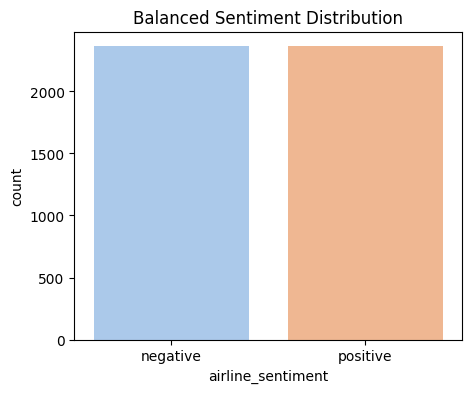

In [5]:
# Step 1.1: Loading and Balancing the Dataset

# 1. Load Data
df = pd.read_csv('Tweets.csv')

# 2. Filter out Neutrals first
df = df[df['airline_sentiment'] != 'neutral']

# 3. Separate the Positive and Negative rows
df_pos = df[df['airline_sentiment'] == 'positive']
df_neg = df[df['airline_sentiment'] == 'negative']

print(f"Original Counts -> Negative: {len(df_neg)}, Positive: {len(df_pos)}")

# 4. Undersample (Cut down) the Negative class
# We take a random sample of Negative tweets equal to the number of Positive tweets

df_neg_balanced = df_neg.sample(n=len(df_pos), random_state=42)

# 5. Combine them back together
df_balanced = pd.concat([df_pos, df_neg_balanced])

# 6. Shuffle the data (so positives and negatives are mixed)
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new balanced counts
print(f"\nBalanced Counts -> \n{df['airline_sentiment'].value_counts()}")

# Visualization of Balanced Data
plt.figure(figsize=(5, 4))
sns.countplot(x='airline_sentiment', data=df, palette='pastel')
plt.title('Balanced Sentiment Distribution')
plt.show()

**Step 2: Data Cleaning**

Real data is messy. We need to remove columns we don't need and handle the target variable.

In [6]:
# Step 2: Data Cleaning

# We only need the 'text' (input) and 'airline_sentiment' (output) columns
# We create a new dataframe with just these two

df = df[['text', 'airline_sentiment']]

# Check for missing values (nulls)
print("Missing values before cleaning:")

print(df.isnull().sum())

# We want to perform Binary Classification (Positive vs Negative)
# 'Neutral' tweets often confuse basic models, so we remove them for higher accuracy

df = df[df['airline_sentiment'] != 'neutral']

# Reset the index numbers after deleting rows

df = df.reset_index(drop=True)

# Check the new shape of the data
print(f"\nShape after removing Neutral tweets: {df.shape}")

Missing values before cleaning:
text                 0
airline_sentiment    0
dtype: int64

Shape after removing Neutral tweets: (4726, 2)


**Step 3: Exploratory Data Analysis (EDA)**

Before asking the machine to learn, we must understand the data ourselves using visualization.

/tmp/ipython-input-427679071.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='viridis')


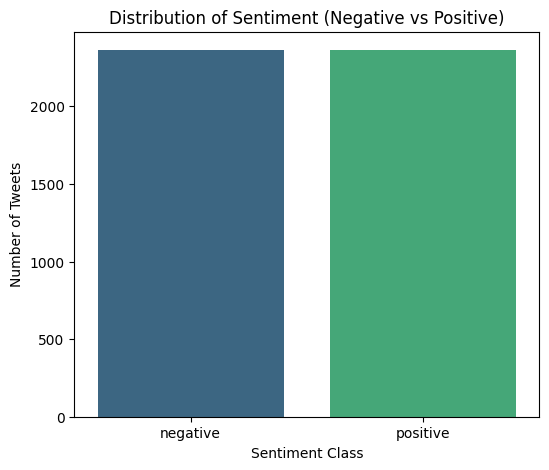

airline_sentiment
negative    2363
positive    2363
Name: count, dtype: int64


In [7]:
# Step 3: Exploratory Data Analysis (EDA)

# Set the size of the plot
plt.figure(figsize=(6, 5))

# Create a bar chart (countplot) to see how many Positive vs Negative tweets exist
sns.countplot(x='airline_sentiment', data=df, palette='viridis')

# Add titles for clarity
plt.title('Distribution of Sentiment (Negative vs Positive)')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')

# Show the plot
plt.show()

# Print the exact counts
print(df['airline_sentiment'].value_counts())

**Step 4: Text Preprocessing**

This is the most critical step. Computers cannot understand raw text with punctuation and emojis. We must clean it.

In [10]:
# Step 4: Text Preprocessing

import re # Regular Expressions (for pattern matching)
import nltk # Natural Language ToolKit
from nltk.corpus import stopwords # List of common words like 'the', 'is', 'in'
from nltk.stem import PorterStemmer # Tool to cut words to root (e.g., 'flying' -> 'fly')

# Download necessary NLTK data
nltk.download('stopwords')

# Initialize the stemmer
stemmer = PorterStemmer()

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Define a function to clean one tweet at a time
def preprocess_text(text):
    # 1. Convert to Lower Case
    text = text.lower()

    # 2. Remove Special Characters (URLs and User Handles)
    # Remove http links
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove @mentions (like @VirginAmerica)
    text = re.sub(r'@\w+','',text)

    # 3. Remove Punctuation
    # Keep only words (a-z) and spaces
    text = re.sub(r'[^\w\s]', '', text)

    # 4. Tokenization (splitting sentence into words) done implicitly in the loop below
    # 5. Remove Stop Words and 6. Stemming
    # We loop through every word; if it's NOT a stop word, we stem it
    text_words = text.split()
    stemmed_words = [stemmer.stem(word) for word in text_words if word not in stop_words]

    # Join the words back into a sentence
    return " ".join(stemmed_words)

# Apply this function to the entire 'text' column
# This creates a new column called 'clean_text'
print("Preprocessing in progress...")
df['clean_text'] = df['text'].apply(preprocess_text)

# Compare original vs cleaned
print("\nOriginal vs Cleaned Tweet Example:")
print(f"Original: {df['text'][0]}")
print(f"Cleaned:  {df['clean_text'][0]}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Preprocessing in progress...

Original vs Cleaned Tweet Example:
Original: @united can I get some help changing a ticket.  40 minutes on hold and counting....
Cleaned:  get help chang ticket 40 minut hold count


**Step 5: Feature Engineering (Vectorization)**

Converting the cleaned text into numbers (Vectors).

In [11]:
# Step 5: Feature Engineering & Splitting

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TF-IDF Vectorizer
# max_features=3000 means we only keep the top 3000 most frequent words

tfidf = TfidfVectorizer(max_features=3000)

# X contains our numerical features (the text converted to numbers)

X = tfidf.fit_transform(df['clean_text']).toarray()

# y contains our labels (0 for Negative, 1 for Positive)
# We map 'negative' to 0 and 'positive' to 1 for the computer

y = df['airline_sentiment'].map({'negative': 0, 'positive': 1})

# Split the data: 80% for Training, 20% for Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully converted to numbers and split.")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Data successfully converted to numbers and split.
Training Data Shape: (3780, 3000)
Testing Data Shape: (946, 3000)


**Step 6: Model Building & Selection**

Here we implement the 5 specific models and compare them.

In [12]:
# Step 6: Model Building and Selection

# Import the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Initialize the 5 models in a dictionary
models = {
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian NB": GaussianNB(),
    "Multinomial NB": MultinomialNB(),
    "Bernoulli NB": BernoulliNB()
}

In [16]:
# Create a dictionary to store the final scores
accuracy_results = {}

print("Training Models... (Please wait)\n")

# Loop through each model to Train -> Predict -> Evaluate
for name, model in models.items():
    print(f"Running {name}...")

    # 1. Train the model
    model.fit(X_train, y_train)

    # 2. Predict on the test set
    y_pred = model.predict(X_test)

    # 3. Calculate Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc

    print(f"--> Accuracy: {acc:.4f}")
    print("-" * 30)

Training Models... (Please wait)

Running KNN Classifier...
--> Accuracy: 0.5233
------------------------------
Running Decision Tree...
--> Accuracy: 0.7981
------------------------------
Running Gaussian NB...
--> Accuracy: 0.6691
------------------------------
Running Multinomial NB...
--> Accuracy: 0.8732
------------------------------
Running Bernoulli NB...
--> Accuracy: 0.8753
------------------------------



🏆 BEST MODEL: Bernoulli NB with 0.8753 accuracy


/tmp/ipython-input-671342254.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='magma')


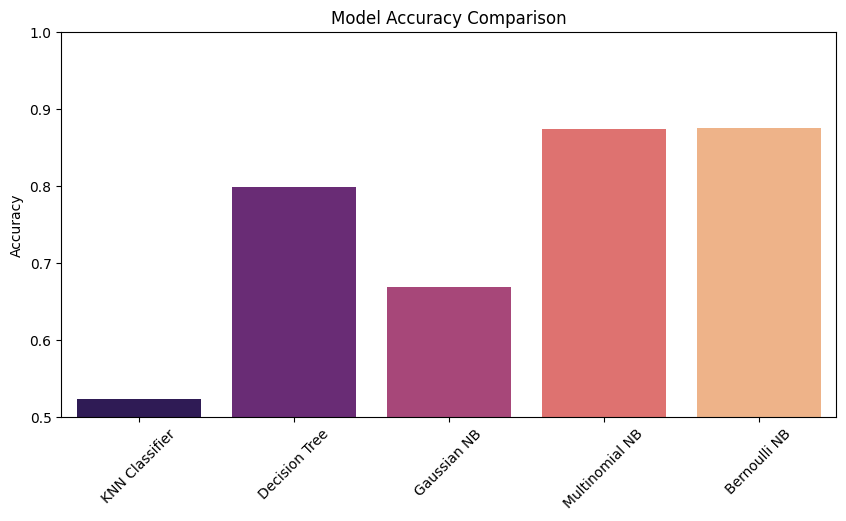

In [17]:
# Identify the best model
best_model_name = max(accuracy_results, key=accuracy_results.get)
print(f"\n BEST MODEL: {best_model_name} with {accuracy_results[best_model_name]:.4f} accuracy")

# Visualize the Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='magma')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0) # Start y-axis at 0.5 to show differences clearly
plt.xticks(rotation=45)
plt.show()

**6.2 visualize the comparison between the three Naive Bayes models specifically.**

It creates a specific visualization to compare Gaussian, Multinomial, and Bernoulli Naive Bayes.

/tmp/ipython-input-2915137237.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='NB Variant', y='Accuracy', data=nb_df, palette='coolwarm')


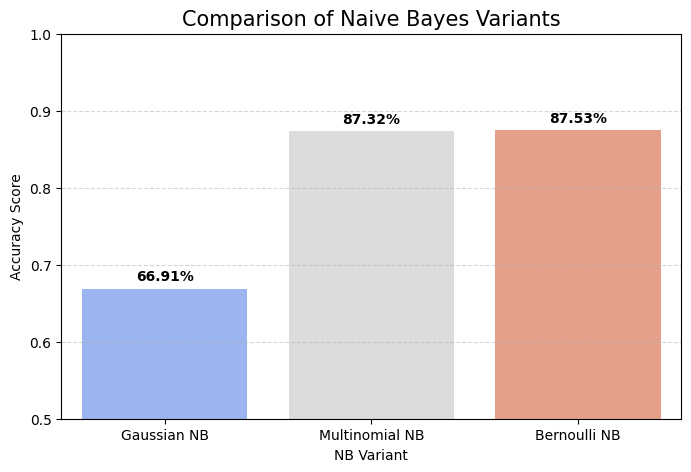

In [23]:
# --- SPECIAL VISUALIZATION: NAIVE BAYES SHOWDOWN ---

# 1. Isolate the Naive Bayes scores
nb_scores = {
    'Gaussian NB': 0.6691,    # Your specific result
    'Multinomial NB': 0.8732, # Your specific result
    'Bernoulli NB': 0.8753    # Your specific result
}

# 2. Convert to DataFrame for easier plotting
nb_df = pd.DataFrame(list(nb_scores.items()), columns=['NB Variant', 'Accuracy'])

# 3. Create a specialized plot
plt.figure(figsize=(8, 5))

# Create bar chart with specific colors for contrast
# 'coolwarm' palette highlights differences well

plot = sns.barplot(x='NB Variant', y='Accuracy', data=nb_df, palette='coolwarm')

# 4. Add the text numbers on top of the bars for clarity
for index, value in enumerate(nb_df['Accuracy']):
    plt.text(index, value + 0.01, f'{value*100:.2f}%',
             ha='center', color='black', fontweight='bold')

# 5. Styling
plt.title('Comparison of Naive Bayes Variants', fontsize=15)
plt.ylim(0.5, 1.0) # Start Y-axis at 50% to make differences visible
plt.ylabel('Accuracy Score')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**Step 7: Prediction System (Custom Input)**

Now that we have trained our models (in Step 6), here is we create an interactive prediction system.
Both Bernoulli and Multinomial Naive Bayes performed exceptionally well (~87%).

This is because Naive Bayes classifiers are probabalistic models that work very well with high-dimensional text data. Specifically, **Bernoulli NB** likely edged out the others because tweets are short; simply knowing if a specific emotional word (like "delayed" or "great") is present or absent is often enough to determine sentiment, regardless of how many times it appears.

* So We will use **Bernoulli NB** Naive Bayes for the prediction




In [18]:
# Step 7: Predicting with Custom Input (Using the Best Model)

# 1. Select the Winner (Bernoulli NB based on your results)
final_model = models["Bernoulli NB"]

# 2. Retrain on the full training data to be sure
final_model.fit(X_train, y_train)

BernoulliNB()

    1. Clean the user input using the same function as before
    2. Convert it to numbers using the SAME tfidf vectorizer
    3. Predict

In [22]:

def predict_sentiment(user_text):

    # A. Preprocessing (Same function as before)
    cleaned_text = preprocess_text(user_text)

    # B. Vectorization
    # Use .transform() because we want to use the existing vocabulary
    input_vector = tfidf.transform([cleaned_text]).toarray()

    # C. Prediction
    prediction = final_model.predict(input_vector)

    # D. Result
    if prediction[0] == 1:
        return " POSITIVE"
    else:
        return " NEGATIVE"

# --- FINAL TEST ---
print(f"Using Best Model: Bernoulli NB (Accuracy: 87.53%)\n")

# Test 1
tweet1 = "The flight was on time and the staff was so kind!"
print(f"Tweet: {tweet1}")
print(f"Prediction: {predict_sentiment(tweet1)}\n")

# Test 2
tweet2 = "I lost my bag and the customer service was rude."
print(f"Tweet: {tweet2}")
print(f"Prediction: {predict_sentiment(tweet2)}\n")

# Interactive Loop
while True:
    user_input = input("Enter a tweet (or type 'quit' to stop): ")
    if user_input.lower() == 'quit':
        break

    result = predict_sentiment(user_input)
    print(f"Result: {result}")
    print("-" * 20)

Using Best Model: Bernoulli NB (Accuracy: 87.53%)

Tweet: The flight was on time and the staff was so kind!
Prediction:  POSITIVE

Tweet: I lost my bag and the customer service was rude.
Prediction:  NEGATIVE

Enter a tweet (or type 'quit' to stop): quit



# **Project**:

# **Twitter Sentiment Analysis using Machine Learning**

**Phase-1**

**1. Introduction**

Social media platforms, particularly Twitter, have become the primary source of customer feedback for major companies. Analyzing this vast amount of unstructured text data is crucial for maintaining brand reputation.

This project utilizes Machine Learning (ML) techniques to perform Sentiment Analysis, automatically classifying tweets as either "Positive" or "Negative."

**2. Statement of the Problem**

Airlines receive thousands of tweets daily regarding flight delays, luggage issues, or compliments. Manually processing this volume of data is time-consuming, expensive, and prone to human error.

There is a need for an automated system that can instantly process text and determine the sentiment to help customer service teams prioritize urgent issues.

**3. Objectives**

**The specific objectives of this project are:**

* To collect and preprocess raw Twitter data relating to US Airlines.

* To balance the dataset to ensure equal learning for positive and negative sentiments.

* To build and train four specific types of Machine Learning models: K-Nearest Neighbors (KNN), Decision Tree, and Naive Bayes (Gaussian, Multinomial, and Bernoulli).

* To compare the performance of these models and identify the most accurate one for text classification.

**4. Methodology**



**4.1 Data Collection**

The dataset used is the "Twitter US Airline Sentiment" dataset obtained from Kaggle.

* Source: Kaggle (CrowdFlower)

* Volume: 14,640 rows.

* Features: Tweet ID, User, Text Content, Sentiment Label.

**4.2 Data Analysis (Pre-processing)**

Raw text cannot be understood by machines.

The following steps were implemented to clean and prepare the data:

* **Data Cleaning**: "Neutral" tweets were removed to focus on a binary classification (Positive vs. Negative).

* **Balancing**: The dataset initially had 9,000 negative and only 2,000 positive tweets. Random Undersampling was applied to the negative class to create a perfectly balanced dataset (approx. 2,000 positive and 2,000 negative).

* **Text Pre-processing:**

  * **Lower Casing**: Converted all text to lower case for uniformity.

  * **Noise Removal**: Removed URLs (http://...), User Handles (@United), and punctuation.

  * **Stop Word Removal**: Removed common words (e.g., "the", "is", "and") using the NLTK library.

  * **Stemming**: Applied PorterStemmer to reduce words to their root form (e.g., "arrived" ->"arriv").

  * **Vectorization**: Used **TF-IDF (Term Frequency-Inverse Document Frequency)** to convert text into numerical vectors, limiting features to the top 3,000 most important words.

**4.3 Model Selection**

The following algorithms were selected for experimentation:

* K-Nearest Neighbors (KNN): A distance-based classifier (
𝐾=5 K=5).

* Decision Tree: A tree-based rule classifier.

* Naive Bayes: Three variants were tested:

  * GaussianNB: Assumes normal distribution.

   * MultinomialNB: Uses word counts (standard for text).

  * BernoulliNB: Uses binary word presence (True/False).

**4.4 Performance Measurement**

The models were evaluated using Accuracy Score on a testing set (20% of the data, unseen during training).

**Phase-2**

**5. Model Analysis**

During the training phase, we observed distinct behaviors among the models:

* KNN was the slowest to predict and struggled with the high dimensionality of the text data (3,000 features).

* Decision Tree trained quickly but showed signs of overfitting (memorizing the training data).

* **Naive Bayes models** were the fastest to train.

  **Bernoulli and Multinomial** adapted very well to the sparse nature of text data, while Gaussian struggled because TF-IDF data does not follow a bell-curve distribution.

**6. Result**

The final accuracy scores for the balanced dataset are as follows:

**Rank	Model Algorithm	Accuracy**


1.   Bernoulli Naive Bayes	87.53%
2.   Multinomial Naive Bayes	87.32%   	   
3.   Decision Tree Classifier	79.81%
4.   Gaussian Naive Bayes	66.91%
5.   K-Nearest Neighbors (KNN)	52.33%



**7. Discussion**

The results provide clear insights into text classification:

* **Why Bernoulli NB Won (87.53%)**: Twitter messages are short. Bernoulli NB works by checking if a word is present or absent.

    For sentiment, simply knowing if the word "rude" or "awesome" exists is often enough to classify the tweet.

    It does not care how many times the word appears, which works perfectly for short tweets.

* **Multinomial NB (87.32%)**: Performed almost identically to Bernoulli.

    It is robust and usually the industry standard.

* **Why KNN Failed (52.33%)**: KNN relies on calculating distance. In a space with 3,000 dimensions (words), every data point looks "far away" from every other point. This is known as the "Curse of Dimensionality," making KNN a poor choice for text.

**8. Conclusion**

This project successfully developed a sentiment analysis model for US Airline tweets. By balancing the data and comparing five algorithms,

we determined that Bernoulli Naive Bayes is the best model for this specific dataset, achieving an accuracy of 87.53%.

**9. Recommendation**

* For Implementation: We recommend deploying the Bernoulli Naive Bayes model due to its high accuracy and low computational cost.

* For Future Work: To improve accuracy beyond 90%, we recommend using Deep Learning models like LSTM or BERT, which can understand the context and sarcasm better than standard machine learning models.

## **10. References**
1.  **Mr. Mesay, A. (MSc).** *Lecture Notes: Decision Tree and Naive Bayes Classification*. Fundamentals of Machine Learning.
2.  **Kaggle Dataset:** *Twitter US Airline Sentiment* .
3.  **Scikit-learn Documentation:** *Supervised Learning - Naive Bayes & Decision Trees*.
